## 2016-2-2

Notes on building and testing conductivity circuit here: https://github.com/SparkysWidgets/MinieCHW/blob/master/MinieCV1_2.pdf



### Progress

We've 


### Issue

I'm observing saturation at around 3.8 V.  This is explained by this being the limit of op amp output for this particular op amp.  Might need to go to rail-to-rail (or dial in better input / amplification range).

But how are we getting such a high voltage?
- Input voltage is ~ 250 mV.  
- Gain G = 1 + R_f/R_w
- R_f = 40K
- R_w ~ 20K .. 200K
- See plot below .. shouldn't get more than .8V out of very high conductivity (low resistivity) solutions


Aside on [op-amp](https://en.wikipedia.org/wiki/Operational_amplifier) amplifier circuit:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Operational_amplifier_noninverting.svg">

$G = 1 + R_f/R_w$

Where $R_f$ = 40KOhm in our particular amplifier circuit, and $R_w$ is the water's resistance across the probe we're using.


In [25]:
%matplotlib inline 
# above line allows for showing plots in a cell easily
import matplotlib # the main plotting library
import numpy as np # allows for arrays
import matplotlib.pyplot as plt # getting specific plotting functions

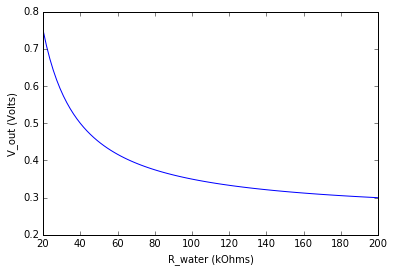

In [47]:
R_water = np.linspace(20, 200, 100)  # 20 .. 200 kOhms
V_in = 0.250 # mV
Rf = 40 # kOhms
y = V_in*(1+(Rf/R_water))
plt.plot(x,y)
plt.xlabel('R_water (kOhms)')
plt.ylabel('V_out (Volts)')

Reason for <a href="http://www.ti.com/lit/ds/symlink/tl072.pdf">TL07xx</a> op amp saturation -- at VCC=5V, max output ~ 3V: <img src="https://raw.githubusercontent.com/OpenWaterProject/conductivity-research/master/images/TL07MaxPeakOutput.png">

... but this still doesn't explain why we're amplifying up to 3V, if the non-water amplifier resistor is 40K.

10uF:
<a href="￼http://www.youtube.com/embed/bkJ653KVroY?rel=0&amp;showinfo=0"><img src="http://img.youtube.com/vi/bkJ653KVroY/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10"></a>


In [37]:
from IPython.display import HTML 
HTML('<iframe width="560" height="315" src="//www.youtube.com/embed/bkJ653KVroY?rel=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')


0.1uF:

In [38]:
from IPython.display import HTML 
HTML('<iframe width="560" height="315" src="//www.youtube.com/embed/bq6PUedEDyg?rel=0&amp;showinfo=0" rel="0" frameborder="0" allowfullscreen></iframe>')


Notes. 

- input to water was .250 volts

- 80 uS led to a voltage output of around 0.25 volts

- 1400 uS led to a voltage output of around 2.5 volts

- R_f = 42K

- should we measure V_in to get an accurate sense of what's going into the water? Is this a way to do the four-probe thing?

- $V_{out} / V_{in} = 1+R_f/R_g$

- $R_f/((V_{out} / V_{in} - 1)) = R_g$

Note that if R_g >>> R_f, we expect that V_out ~= V_in.  We saw that for 80 uS, so that probably means that we need a larger resistor for R_f if we want to measure solutions with such low conductivity values. 

